# Summer Olympics Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('summer.csv')

In [3]:
df.head(10)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
5,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200M Freestyle,Bronze
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
7,1896,Athens,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200M Freestyle,Silver
8,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400M Freestyle,Bronze
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold


In [4]:
df.shape

(31165, 9)

In [5]:
df[df['Country'].isnull()]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver


### here the null value is very less no need to do any change

### 1. In how many cities Summer Olympics is held so far?

In [7]:
len(df['City'].unique())


22

### These are the city in ascending order with respect to the number of Olympics held in that city

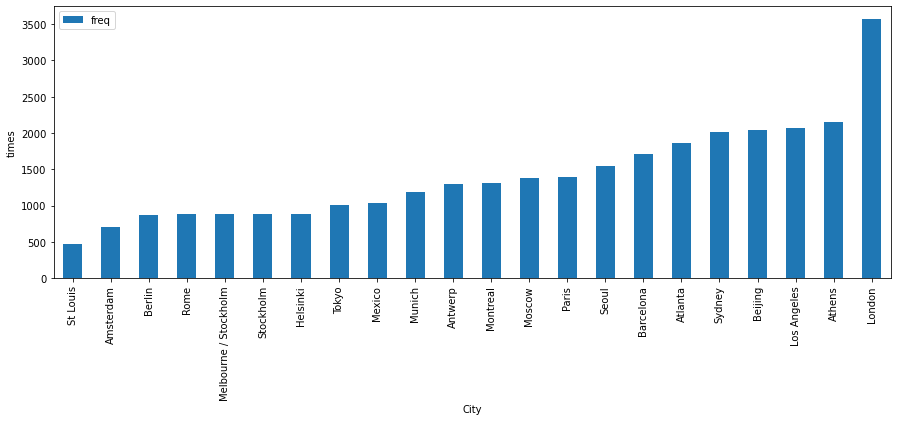

In [8]:
data = []

for cities in df['City'].unique():
    data.append([cities , len(df[df['City']  == cities])])

pd.DataFrame(data,columns = ['City','freq']).sort_values(by='freq', ascending = True).plot(x = 'City', kind = 'bar', figsize = (15,5),ylabel="times")
plt.show()


### 2. Which sport is having most number of Gold Medals so far? (Top 5)

### We can solve this question in many way.

Aquatics      1421
Athletics     1215
Rowing         890
Gymnastics     820
Fencing        552
Name: Sport, dtype: int64


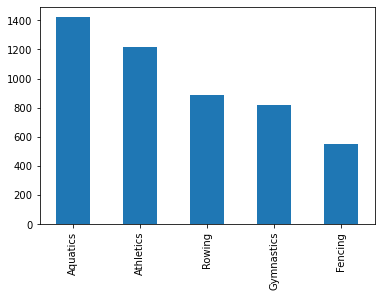

In [9]:
print(df[df['Medal']=="Gold"].Sport.value_counts().head())
(df[df['Medal']=="Gold"].Sport.value_counts().head().plot(kind='bar'))
plt.show()

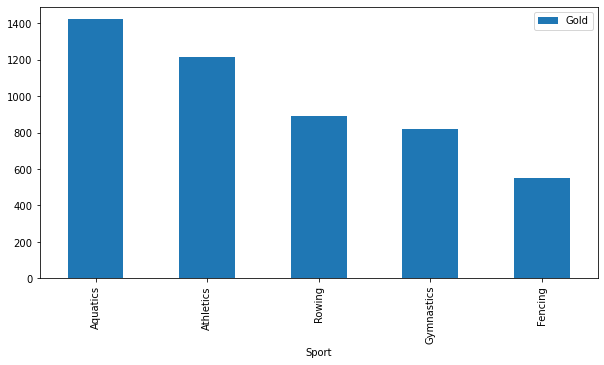

In [11]:
df2=df[df.Medal=="Gold"]
data=[]
for sport in df2['Sport'].unique():
    data.append([sport,len(df2[df2.Sport==sport])])
pd.DataFrame(data,columns=['Sport','Gold']).sort_values(by='Gold',ascending=False).head().plot(x='Sport',y='Gold',kind='bar',figsize=(10,5))
plt.show()

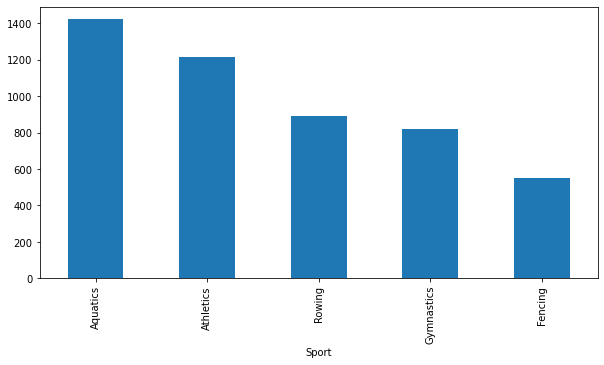

In [12]:
df2.groupby('Sport').count()['Medal'].sort_values(ascending=False).head().plot.bar(figsize=(10,5))
plt.show()


### 3. Which sport is having most number of medals so far? (Top 5)

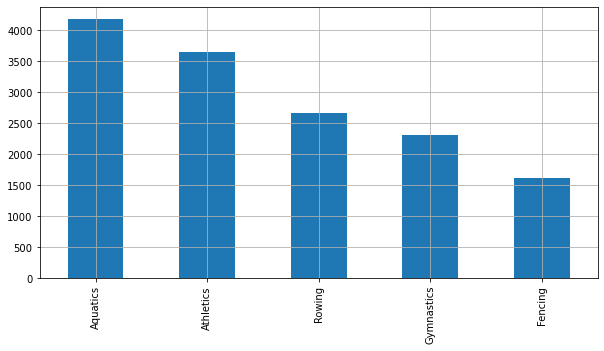

In [13]:
df.Sport.value_counts().head().plot.bar(figsize=(10,5),grid=1)
plt.show()

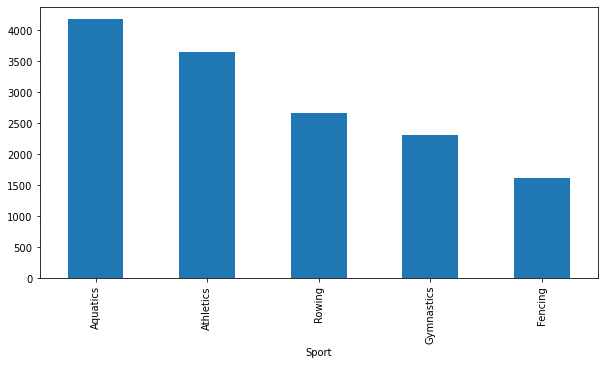

In [14]:
df.groupby('Sport').count()['Medal'].sort_values(ascending=False).head().plot.bar(figsize=(10,5))
plt.show()

### 4. Which player has won most number of medals? (Top 5)

PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
ONO, Takashi            13
MANGIAROTTI, Edoardo    13
Name: Athlete, dtype: int64


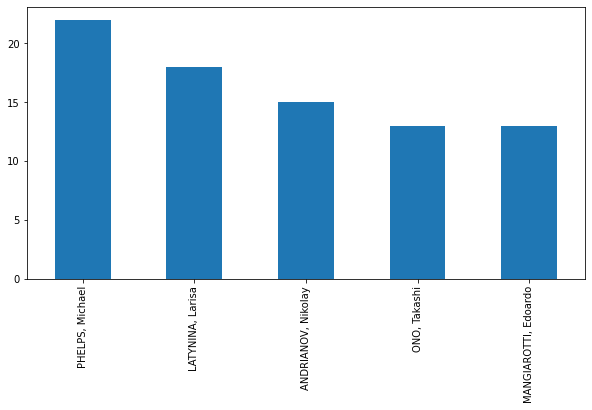

In [15]:
print(df.Athlete.value_counts().head())
df.Athlete.value_counts().head().plot(kind='bar',figsize=(10,5))
plt.show()

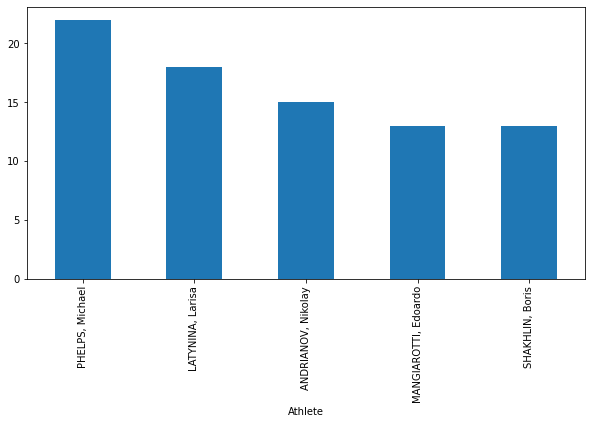

In [16]:
df.groupby('Athlete').count()['Medal'].sort_values(ascending=False).head().plot.bar(figsize=(10,5))
plt.show()

### 5. Which player has won most number Gold Medals of medals? (Top 5)

PHELPS, Michael     18
NURMI, Paavo         9
LEWIS, Carl          9
SPITZ, Mark          9
LATYNINA, Larisa     9
Name: Athlete, dtype: int64


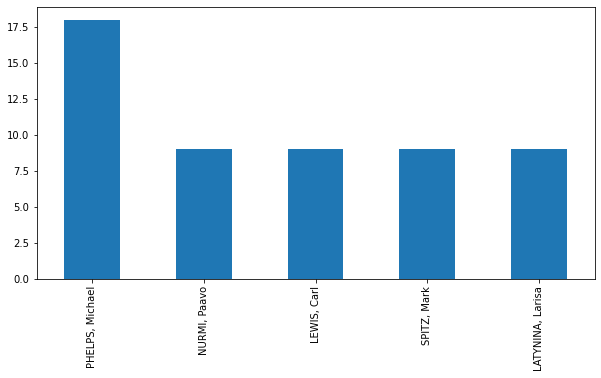

In [17]:
print(df[df.Medal=="Gold"].Athlete.value_counts().head())
df[df.Medal=="Gold"].Athlete.value_counts().head().plot.bar(figsize=(10,5))
plt.show()

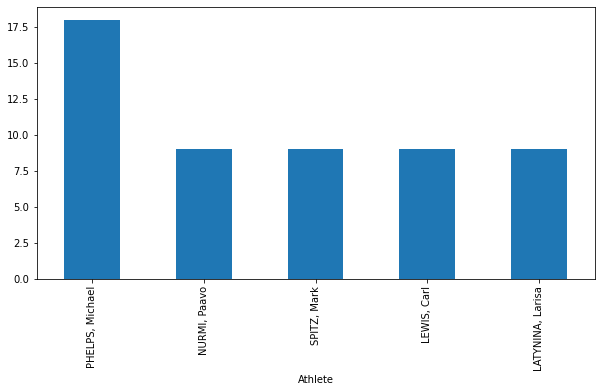

In [18]:
df2.groupby('Athlete').count()['Medal'].sort_values(ascending=False).head().plot.bar(figsize=(10,5))
plt.show()

### 6. In which year India won first Gold Medal in Summer Olympics?

In [19]:
min(df2[df2.Country=="IND"].Year)

1928

### 7. Which event is most popular in terms on number of players? (Top 5)

Football            1497
Hockey              1422
Team Competition    1147
Basketball          1012
Handball             973
Name: Event, dtype: int64


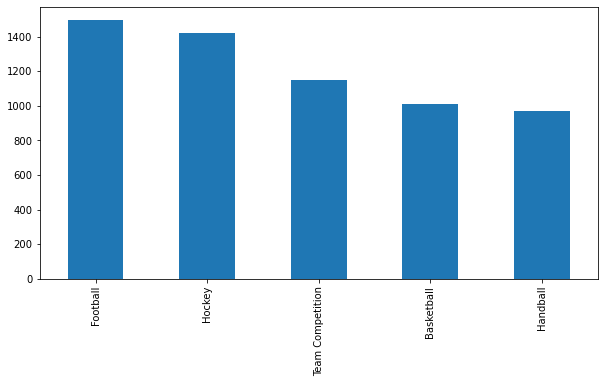

In [20]:
print(df["Event"].value_counts().head())
df["Event"].value_counts().head().plot.bar(figsize=(10,5))
plt.show()

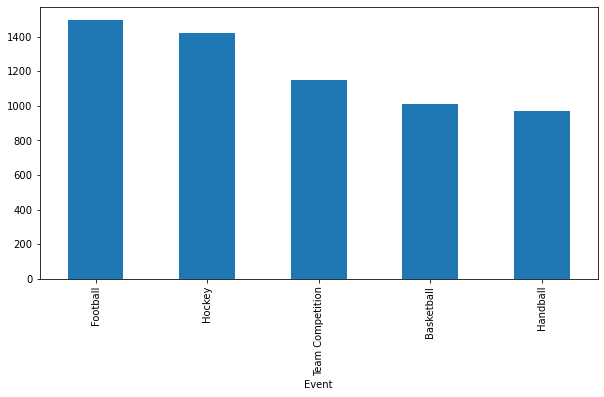

In [21]:
df.groupby('Event').count()['Athlete'].sort_values(ascending=False).head().plot.bar(figsize=(10,5))
plt.show()

### 8. Which sport is having most female Gold Medalists? (Top 5)

Aquatics      589
Athletics     389
Gymnastics    268
Rowing        217
Volleyball    166
Name: Sport, dtype: int64


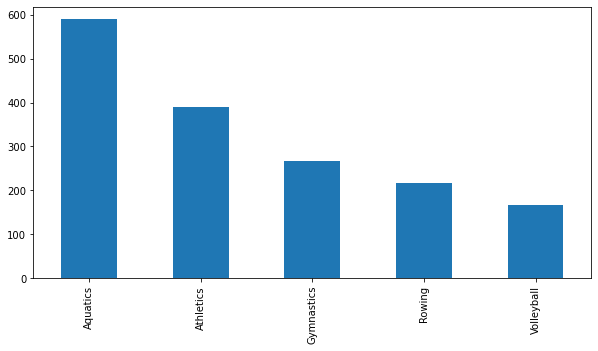

In [22]:
print(df2[df2.Gender=="Women"].Sport.value_counts().head())
df2[df2.Gender=="Women"].Sport.value_counts().head().plot.bar(figsize=(10,5))
plt.show()

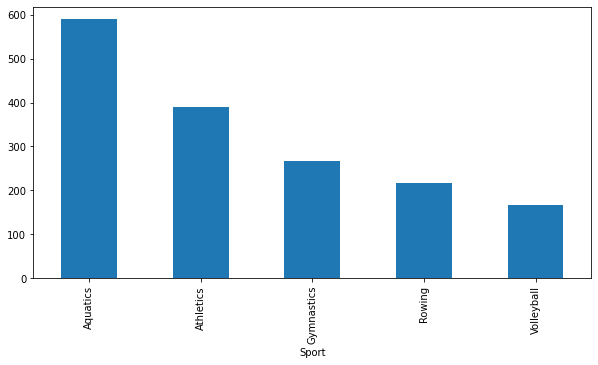

In [23]:
df3=df2[df2.Gender=="Women"]
df3.groupby('Sport').count()['Medal'].sort_values(ascending=False).head().plot.bar(figsize=(10,5))
plt.show()